# 0. Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import geopandas as gpd

from pyinterpolate import prepare_areal_shapefile  # Prepare data
from pyinterpolate import get_points_within_area  # Prepare data
from pyinterpolate import calculate_semivariance  # Experimental semivariogram
from pyinterpolate import RegularizedSemivariogram  # Semivariogram regularization class

import matplotlib.pyplot as plt

# 1. Read csv (or excel) data
Columns should consist of:
    
    ID  3 or 4 digit ID where first one/two digits are voivodships id and two last of districts in that voivodship
    NAZWA name of the district
    VOIVOD name of voivodship
    next columns contain actual data

In [2]:
df = pd.read_csv('input_data/raw_covid_data/covid wrzesien cropped.csv', sep=';', index_col='ID')
df.head()

,NAZWA,VOIVOD,1.09,14.09,30.09
ID,,,,,
201,powiat aleksandrowski,kujawsko-pomorskie,57,94,213
202,powiat brodnicki,kujawsko-pomorskie,45,52,73
203,powiat bydgoski i Bydgoszcz,kujawsko-pomorskie,336,366,501
204,powiat chełmiński,kujawsko-pomorskie,84,87,96
205,powiat golubsko-dobrzyński,kujawsko-pomorskie,10,11,16


# 2. Read shapefile data.

In [3]:
gdf = gpd.read_file('input_data/powiaty/Powiaty.shp', encoding='utf8')
gdf.set_index('ID', inplace=True)
gdf.head()

,NAZWA,VOIVOD,geometry
ID,,,
915,powiat ropczycko-sędziszowski,podkarpackie,"POLYGON ((21.69429 50.17849, 21.69440 50.17849..."
710,powiat łosicki,mazowieckie,"POLYGON ((22.72381 52.28039, 22.72379 52.28043..."
718,powiat piaseczyński,mazowieckie,"POLYGON ((21.11010 52.11317, 21.10875 52.11459..."
727,powiat sierpecki,mazowieckie,"POLYGON ((19.50876 52.86784, 19.50873 52.86795..."
730,powiat szydłowiecki,mazowieckie,"POLYGON ((20.80150 51.31374, 20.80195 51.31390..."


# 3. Merge data.
Using `.merge()` function looses indexes and there were problems making it not loose it. Because of that `.join()` was used

In [4]:
second_df = df.drop(['NAZWA','VOIVOD'], axis=1)

ndf = gdf.join(second_df, lsuffix='_g')
ndf.head()
#ndf.dropna()

,NAZWA,VOIVOD,geometry,1.09,14.09,30.09
ID,,,,,,
915,powiat ropczycko-sędziszowski,podkarpackie,"POLYGON ((21.69429 50.17849, 21.69440 50.17849...",NaN,NaN,NaN
710,powiat łosicki,mazowieckie,"POLYGON ((22.72381 52.28039, 22.72379 52.28043...",NaN,NaN,NaN
718,powiat piaseczyński,mazowieckie,"POLYGON ((21.11010 52.11317, 21.10875 52.11459...",NaN,NaN,NaN
727,powiat sierpecki,mazowieckie,"POLYGON ((19.50876 52.86784, 19.50873 52.86795...",NaN,NaN,NaN
730,powiat szydłowiecki,mazowieckie,"POLYGON ((20.80150 51.31374, 20.80195 51.31390...",NaN,NaN,NaN


## To make sure everything is working we can polt data


,NAZWA,VOIVOD,geometry,1.09,14.09,30.09
ID,,,,,,
915,powiat ropczycko-sędziszowski,podkarpackie,"POLYGON ((21.69429 50.17849, 21.69440 50.17849...",NaN,NaN,NaN
710,powiat łosicki,mazowieckie,"POLYGON ((22.72381 52.28039, 22.72379 52.28043...",NaN,NaN,NaN
718,powiat piaseczyński,mazowieckie,"POLYGON ((21.11010 52.11317, 21.10875 52.11459...",NaN,NaN,NaN
727,powiat sierpecki,mazowieckie,"POLYGON ((19.50876 52.86784, 19.50873 52.86795...",NaN,NaN,NaN
730,powiat szydłowiecki,mazowieckie,"POLYGON ((20.80150 51.31374, 20.80195 51.31390...",NaN,NaN,NaN


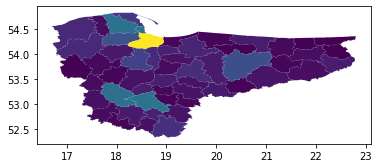

In [6]:
ndf.plot(column='14.09', cmap='viridis')
ndf.head()

## Also we can look at basic statistic

In [8]:
ndf.describe()

,1.09,14.09,30.09
count,55.000000,55.000000,55.000000
mean,88.054545,106.000000,168.000000
std,135.704256,159.763251,233.590097
min,0.000000,3.000000,3.000000
25%,21.000000,25.000000,48.500000
50%,45.000000,54.000000,82.000000
75%,88.000000,110.500000,195.500000
max,852.000000,1013.000000,1424.000000


# 4. Saving data before further analysis
## Droping columns with polish characters
Saving to file does not support polish characters, even with properly defined encoding.
Also no need for saving empty records, so `.dropna()` is used

In [15]:
for_saving_ndf = ndf.drop(['NAZWA','VOIVOD'], axis=1)
for_saving_ndf = for_saving_ndf.dropna()

## Store it as a new file

In [16]:
for_saving_ndf.to_file('./input_data/merged_data_and_shp/covid_wrzesien.shp')

CPLE_NotSupported in driver ESRI Shapefile does not support creation option ENCODING
